In [1]:
import tensorflow as tf  #DROPUT
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [2]:
image_height, image_width = 48, 48

In [3]:
train_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/train',  
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

validation_dataset = image_dataset_from_directory(
    'C:/Users/frat5/Desktop/jupyter/archive1/images/validation',  
    shuffle=True,
    batch_size=32,
    image_size=(image_height, image_width),
    color_mode='grayscale')

Found 11157 files belonging to 2 classes.
Found 2785 files belonging to 2 classes.


In [4]:
model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),  
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dropout(0.5),  
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(
    train_dataset, 
    epochs=50, 
    validation_data=validation_dataset
)

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6046 - loss: 3.8793 - val_accuracy: 0.6553 - val_loss: 0.6582
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6400 - loss: 0.6547 - val_accuracy: 0.6557 - val_loss: 0.6403
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6495 - loss: 0.6402 - val_accuracy: 0.6794 - val_loss: 0.5891
Epoch 4/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6724 - loss: 0.6026 - val_accuracy: 0.7016 - val_loss: 0.5434
Epoch 5/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7002 - loss: 0.5762 - val_accuracy: 0.7203 - val_loss: 0.5132
Epoch 6/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.7402 - loss: 0.5231 - val_accuracy: 0.7792 - val_loss: 0.4635
Epoch 7/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7660 - loss: 0.4905 - val_accuracy: 0.8050 - val_loss: 0.4148
Epoch 8/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7789 - loss: 0.4632 - 

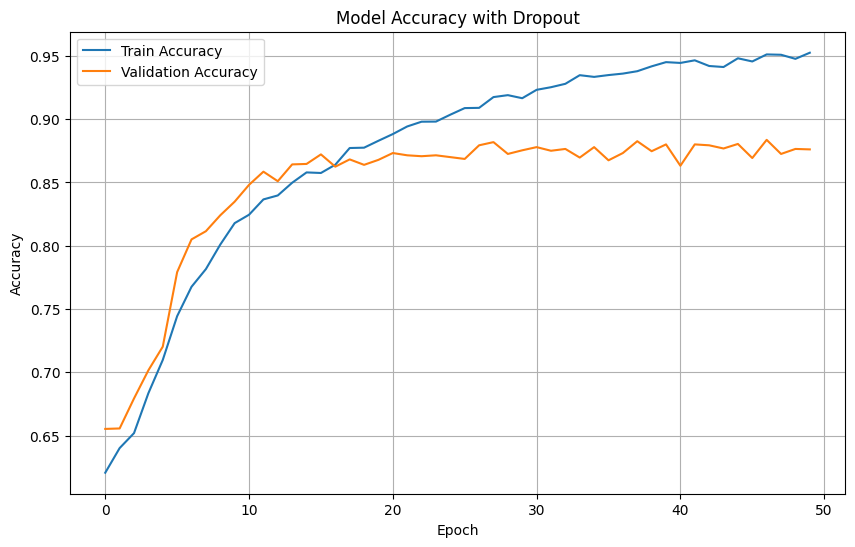

In [7]:
# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
# Save the model with the '.keras' extension
model.save('hadroput_model.keras')  # This specifies the Keras native format